In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import fixed_point

In [2]:
crange = np.linspace(0, 5, 10000)
n_ap = []
N = int(100)

In [3]:
for c in crange:
    G = nx.erdos_renyi_graph(N, c / (N - 1))
    n_ap.append(len(list(nx.articulation_points(G))) / N)
n_ap = np.array(n_ap)

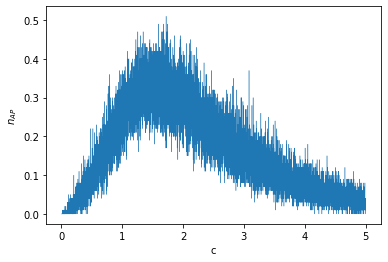

In [4]:
plt.plot(crange, n_ap, '-', lw=.4)
plt.xlabel('c')
plt.ylabel('$n_{AP}$');

In [5]:
def average_over(arr, nbatch):
    return arr.reshape((-1, nbatch)).mean(axis=1)

In [6]:
crange_ave = average_over(crange, 100)
n_ap_ave = average_over(n_ap, 100)

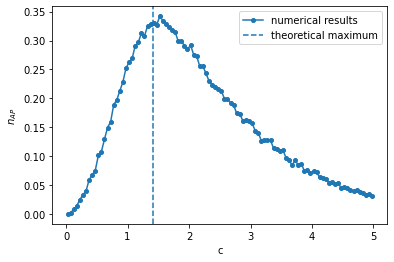

In [11]:
plt.plot(crange_ave, n_ap_ave, '-o', ms=4, lw=1.5, label='numerical results')
# plt.plot(crange, nth, '-')
plt.axvline(x=1.41868, ls='--', label='theoretical maximum')
plt.xlabel('c')
plt.ylabel('$n_{AP}$')
plt.legend();

In [74]:
def P(k, c):
    return poisson.pmf(k, mu=c)

In [75]:
def G(x, c):
    return np.exp(-c * (1. - x))

In [76]:
alpha0 = .1 * np.ones_like(crange)
alpha = fixed_point(G, alpha0, args=(crange,))

n_ap_ana = 1 - G(1 - alpha, crange) - crange * alpha * G(np.zeros_like(crange), crange)

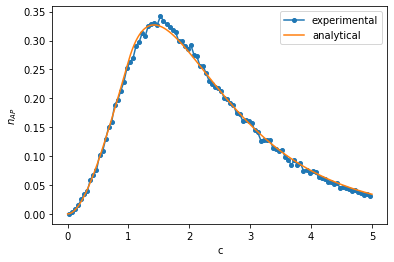

In [77]:
plt.plot(crange_ave, n_ap_ave, '-o', ms=4, lw=1.5, label='experimental')
plt.plot(crange, n_ap_ana, '-', label='analytical')
plt.xlabel('c')
plt.ylabel('$n_{AP}$')
plt.legend();